Lambda School Data Science

---

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [1070]:
# Import Data
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

Let's check the shape of what we were given.

In [1071]:
df.shape

(421, 65)

Use Pandas to describe the dataset.

In [1072]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,87.000000,87.000000,414.000000,418.000000,22.000000,22.000000,283.000000,281.000000,281.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,0.0
mean,3.887356,4.167816,7.067343,3.495335,546.181818,0.675277,20.038233,22.135765,0.786477,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,NaN
std,0.475396,0.373698,1.506742,0.812069,144.445619,0.080468,2.083518,1.779408,0.152531,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,NaN
75%,4.000000,4.400000,7.880000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


Zoom into the actual columns and rows with the .head() method.

In [1073]:
df.head(2)

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Use .info() method to inspect the null values and the data types. Wow, that's a lot of columns!

In [1074]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        421 non-null    object 
 1   Burrito         421 non-null    object 
 2   Date            421 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            414 non-null    float64
 10  Hunger          418 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          283 non-null    float64
 14  Circum          281 non-null    float64
 15  Volume          281 non-null    float64
 16  Tortilla        421 non-null    float64
 17  Temp            401 non-null    flo

Regrettably, some features are just not supported by a meaningful number of observations.

In [1075]:
observations_to_drop = ['Queso', 'Carrots', 'Ham', 'Lobster', 'Sushi', 'Corn', 'Zucchini', 'Bacon', 'Mushroom' ]
df.drop(observations_to_drop, axis=1, inplace=True)

### Conduct exploratory data analysis (EDA)

Get the column names again.

In [1076]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Chile relleno',
       'Nopales', 'Egg', 'Avocado', 'Great'],
      dtype='object')

Check if there are any missing values in the target column, `'Great'`.

In [1077]:
df.Great.isnull().sum()

0

Check if the samples are balanced.

In [1078]:
df.Great.replace({False: 0, True: 1}, inplace=True)

Visual representation of the target column: 1 for `'True'` and 0 for `'False'`, see the plot below.

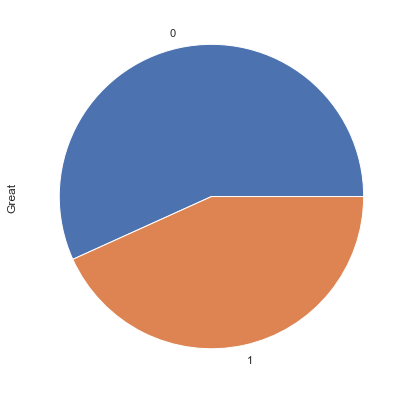

In [1079]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
sns.set(rc={'figure.figsize':(18, 14)})
%matplotlib inline

df.groupby(['Great'])['Great'].count().plot(kind='pie')
plt.gcf().set_size_inches(12, 7)
plt.show()

Some data are categorical as shown in the list below:

In [1080]:
categorical = ['Location','Burrito', 'Neighborhood', 'Address']

How many observations are missing information about neighborhoods?

In [1081]:
df[categorical[2]].isnull().sum()

329

In [1082]:
df[categorical[2]] = df[categorical[2]].fillna('Other Neighborhood')

Let's take a look at the `Neighborhood` category - what are the `Costs` in different neighborhoods?

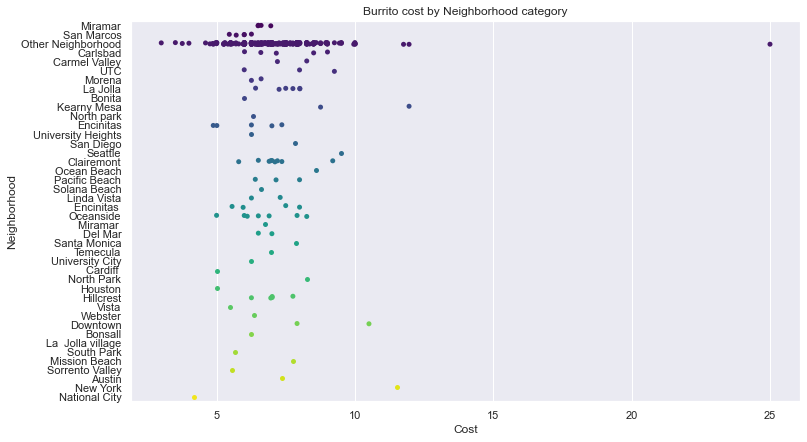

In [1084]:
sns.stripplot(y='Neighborhood', x='Cost', data=df, dodge=True, palette='viridis')
plt.title("Burrito cost by Neighborhood category", fontsize=12)
plt.gcf().set_size_inches(12, 7)

Note, other features are nominal and coded as 'X' or 'x'; some features are ordinal like ratings, and others are measured on an interval scale. Select respective feature names in the following lists: `nominal`, `ordinal`, and `interval`.

In [1085]:
nominal = ['Chips','Beef', 'Pico', 'Guac', 'Cheese',
               'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
               'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Cabbage',
               'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple',
               'Chile relleno', 'Nopales', 'Egg', 'Avocado']


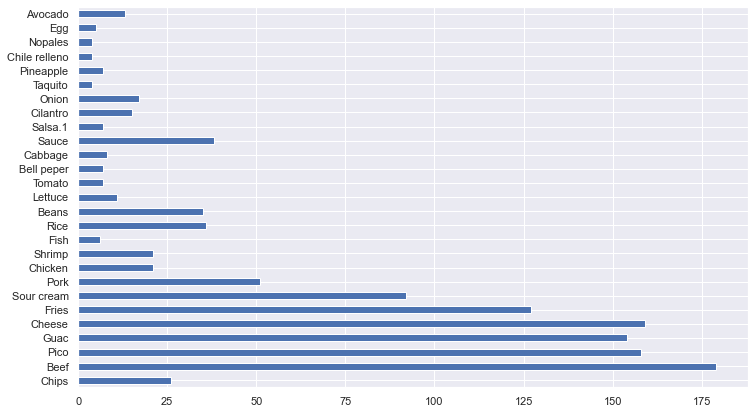

In [1086]:
df[nominal].count().plot(kind='barh')
plt.gcf().set_size_inches(12, 7)
plt.show()

It is easier to work with numbers, replace the coding convention with 0s and 1s.

In [1087]:
df[nominal] = df[nominal].replace({'No': 0, 'Yes': 1, 'x': 1, 'X':1})
df[nominal] = df[nominal].fillna(0)

Check features on ordinary scale (i.e. ratings), expected scale from 0 to 5, now we can do some meaningful descriptive statistics, for example box plot:

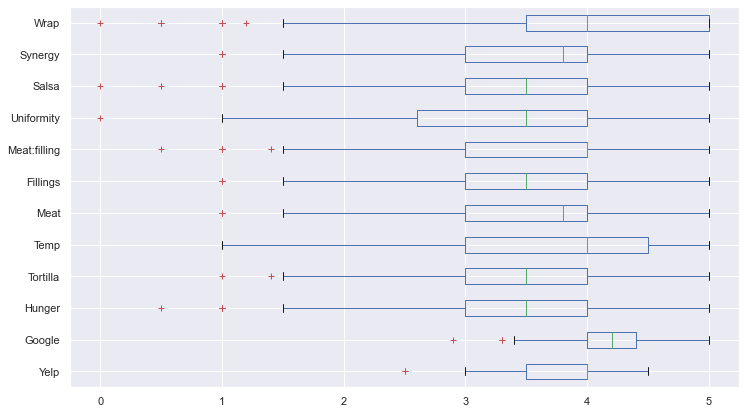

In [1088]:
ordinal = ['Yelp', 'Google', 'Hunger', 'Tortilla', 
           'Temp', 'Meat', 'Fillings', 'Meat:filling', 
           'Uniformity', 'Salsa', 'Synergy', 'Wrap']

df[ordinal].plot(kind="box", vert=False, sym='r+')
plt.gcf().set_size_inches(12, 7)
plt.show()

Note, several continuous variables are measured on an interval scale:

In [1089]:
interval = ['Cost', 'Mass (g)', 'Density (g/mL)', 'Length', 'Circum', 'Volume']

Correlations are available for this data type:

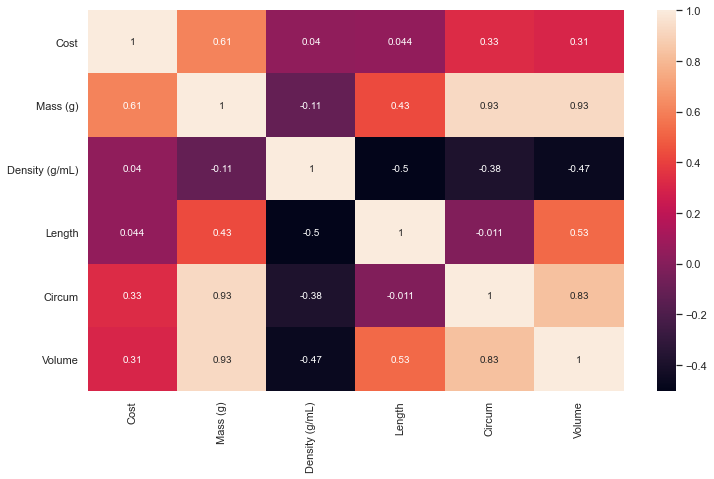

In [1090]:
sns.heatmap(df[interval].corr(), annot=True)
plt.gcf().set_size_inches(12, 7)
plt.show()

Compare two possibly strong explanatory variables: `'Cost'` and `'Hunger'`

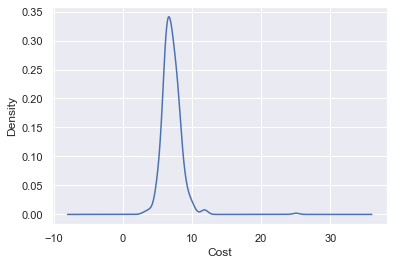

In [1091]:
ax = df[interval[0]].plot(kind='kde')
ax.set(xlabel=continuous[0])
plt.show()


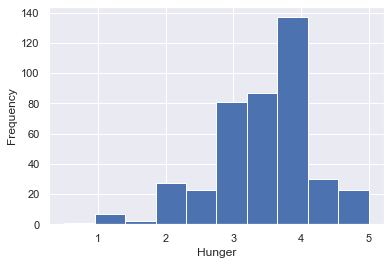

In [1092]:
ax = df[ordinal[2]].plot(kind='hist')
ax.set(xlabel=ordinal[2])
plt.show()

They can be good inputs for the baseline Naive Classifier. How do they move together? We can use a joint plot to do EDA of this behavior.

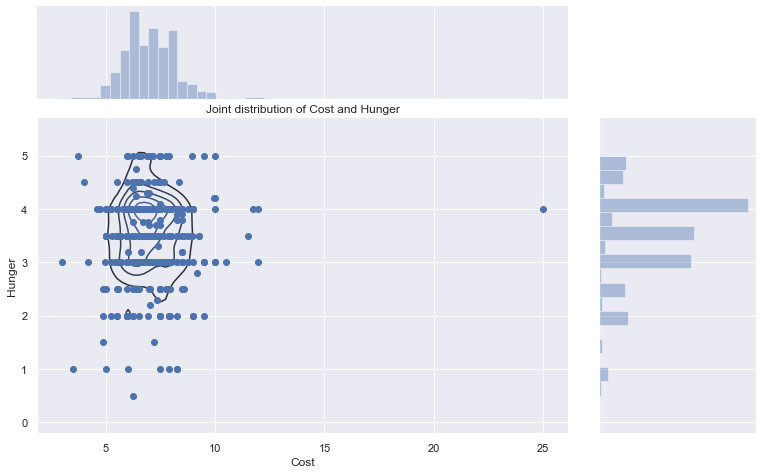

In [1093]:
sns.jointplot(continuous[0], 
              ordinal[2], 
              data=df,
              height=5, 
              ratio=3, 
              color="b"
             ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.gcf().set_size_inches(12, 7)
plt.title("Joint distribution of Cost and Hunger", fontsize=12)
plt.show()

### Clean data

Convert Date string to the datetime object first. This will be important later when we will split the data set.

In [1094]:
df.Date.head(2)

0    1/18/2016
1    1/24/2016
Name: Date, dtype: object

In [1095]:
df.Date = pd.to_datetime(df.Date)

In [1096]:
df.Date.head(2)

0   2016-01-18
1   2016-01-24
Name: Date, dtype: datetime64[ns]

In [1097]:
df = df.reset_index()

Check for missing data and NaNs in ordinal and interval features. Divide by total number of observations to get an idea of missing values proportion.

In [1098]:
df[[categorical[2]] + ordinal + interval].isnull().sum().sort_values() / len(df)

Neighborhood      0.000000
Tortilla          0.000000
Synergy           0.004751
Uniformity        0.004751
Fillings          0.007126
Wrap              0.007126
Hunger            0.007126
Cost              0.016627
Meat:filling      0.021378
Meat              0.033254
Temp              0.047506
Salsa             0.059382
Length            0.327791
Circum            0.332542
Volume            0.332542
Google            0.793349
Yelp              0.793349
Mass (g)          0.947743
Density (g/mL)    0.947743
dtype: float64

Below is the list of potentially good features, only around 3% or less of observations seem to be missing - can be dropped or imputed. In order to avoid the data leak, imputing of missing values should be done after train/test split. Dropping, on the other hand, may be done before the split.

`'Neighborhood'` is an exception as it is categorical feature and can be used later to demo pipelines.

In [1099]:
features = ['Neighborhood', 'Tortilla', 'Uniformity', 'Synergy', 
            'Hunger', 'Fillings', 'Wrap', 
            'Cost', 'Meat:filling', 'Meat', 
            'Temp', 'Salsa']
# Consider using imputer instead of dropping features
# https://datascience.stackexchange.com/questions/30376/how-do-we-standardize-arrays-with-nan/56696

In [1100]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  421 non-null    object 
 1   Tortilla      421 non-null    float64
 2   Uniformity    419 non-null    float64
 3   Synergy       419 non-null    float64
 4   Hunger        418 non-null    float64
 5   Fillings      418 non-null    float64
 6   Wrap          418 non-null    float64
 7   Cost          414 non-null    float64
 8   Meat:filling  412 non-null    float64
 9   Meat          407 non-null    float64
 10  Temp          401 non-null    float64
 11  Salsa         396 non-null    float64
dtypes: float64(11), object(1)
memory usage: 39.6+ KB


In [1101]:
import numpy as np
df[df[features].replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
cleaned_df = df[features + ['Date', 'Great']].dropna()

In [1102]:
len(cleaned_df)

356

In [1103]:
cleaned_df.head(2)

,Neighborhood,Tortilla,Uniformity,Synergy,Hunger,Fillings,Wrap,Cost,Meat:filling,Meat,Temp,Salsa,Date,Great
0,Miramar,3.0,4.0,4.0,3.0,3.5,4.0,6.49,4.0,3.0,5.0,4.0,2016-01-18,0
1,San Marcos,2.0,4.0,2.5,3.5,2.5,5.0,5.45,2.0,2.5,3.5,3.5,2016-01-24,0


In [1104]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 420
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Neighborhood  356 non-null    object        
 1   Tortilla      356 non-null    float64       
 2   Uniformity    356 non-null    float64       
 3   Synergy       356 non-null    float64       
 4   Hunger        356 non-null    float64       
 5   Fillings      356 non-null    float64       
 6   Wrap          356 non-null    float64       
 7   Cost          356 non-null    float64       
 8   Meat:filling  356 non-null    float64       
 9   Meat          356 non-null    float64       
 10  Temp          356 non-null    float64       
 11  Salsa         356 non-null    float64       
 12  Date          356 non-null    datetime64[ns]
 13  Great         356 non-null    int64         
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 41.7+ KB


### Do train/validate/test split

Train on reviews from 2016 & earlier (expected 250 instances):

In [1172]:
X_train = cleaned_df.loc[cleaned_df.Date < '2017']
X_train = X_train.drop('Date', axis=1)
y_train = X_train.pop('Great')


In [1173]:
X_train.head()

,Neighborhood,Tortilla,Uniformity,Synergy,Hunger,Fillings,Wrap,Cost,Meat:filling,Meat,Temp,Salsa
0,Miramar,3.0,4.0,4.0,3.0,3.5,4.0,6.49,4.0,3.0,5.0,4.0
1,San Marcos,2.0,4.0,2.5,3.5,2.5,5.0,5.45,2.0,2.5,3.5,3.5
2,Other Neighborhood,3.0,4.0,3.0,1.5,3.0,5.0,4.85,4.5,2.5,2.0,3.0
3,Other Neighborhood,3.0,5.0,4.0,2.0,3.0,5.0,5.25,4.0,3.5,2.0,4.0
4,Carlsbad,4.0,5.0,4.5,4.0,3.5,4.0,6.59,4.5,4.0,5.0,2.5


Validate on 2017 (expected 74 instances):

In [1174]:
X_validate = cleaned_df.loc[(cleaned_df.Date > '2017') & (cleaned_df.Date < '2018')].copy()
X_validate = X_validate.drop('Date', axis=1)
y_validate = X_validate.pop('Great')
len(X_validate)

74

Test on 2018 & later (expected 32 instances):

In [1175]:
X_test = cleaned_df.loc[cleaned_df.Date > '2018'].copy()
X_test = X_test.drop('Date', axis=1)
y_test = X_test.pop('Great')
len(X_test)

32

### Determine baseline accuracy for a naïve classification model

Predicting Greatness from selected 2 features only

In [1110]:
X_train_naive = X_train.drop(X_train.columns.difference(['Cost','Hunger']), axis=1)

Input array is ready for model training 

In [1111]:
X_train_naive.isnull().values.any()

False

In [1112]:
X_train_naive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hunger  250 non-null    float64
 1   Cost    250 non-null    float64
dtypes: float64(2)
memory usage: 15.9 KB


In [1113]:
from sklearn.linear_model import LogisticRegression

naive_clf = LogisticRegression(random_state=123).fit(X_train_naive, y_train)

In [1119]:
X_validate_naive = X_validate.drop(X_train.columns.difference(['Cost','Hunger']), axis=1)
X_validate_naive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 301 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hunger  74 non-null     float64
 1   Cost    74 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


Use AUC to check the overall predictive poor of the model; 50% being a random chance

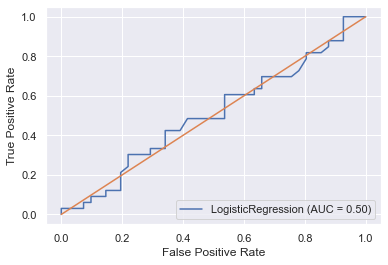

In [1135]:
from sklearn.metrics import plot_roc_curve
naive_clf_auc_ins = plot_roc_curve(naive_clf, X_validate_naive, y_validate)
plt.grid(True)
plt.plot([0, 1], [0, 1])
plt.show()

In [1124]:
X_test_naive = X_test.drop(X_test.columns.difference(['Cost','Hunger']), axis=1)
X_test_naive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 77 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hunger  32 non-null     float64
 1   Cost    32 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


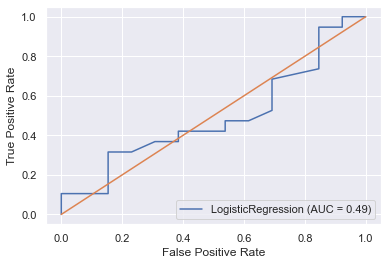

In [1134]:
baseline_clf_auc_oos = plot_roc_curve(naive_clf, X_test_naive, y_test)
plt.grid(True)
plt.plot([0, 1], [0, 1])
plt.show()

In [1127]:
from sklearn.metrics import roc_auc_score
print('Baseline traing accuracy: ', np.round(naive_clf.score(X_train_naive, y_train), 4))
print('Baseline validation accuracy: ', np.round(naive_clf.score(X_validate_naive, y_validate), 4))
print('Baseline oos testing accuracy: ', np.round(naive_clf.score(X_test_naive, y_test), 4))

Baseline traing accuracy:  0.604
Baseline validation accuracy:  0.5541
Baseline oos testing accuracy:  0.5


We can take another stab at this by using cross validation, just to make sure that this performance is not due to a random chance.

In [1130]:
from sklearn.model_selection import cross_val_score

cross_val_score(naive_clf, X_train_naive, y_train, cv=20, scoring='accuracy').mean()

0.6150641025641025

Comparing to the 0 accuracy, i.e. predicting most frequent class: 

In [1209]:
y_train.value_counts(normalize=True)

0    0.616
1    0.384
Name: Great, dtype: float64

The baseline naive model accuracy is truly bad, i.e. the model has no discriminative power at all - let's see if we can improve it by using sklearn pipelines and adding additional features.

### Create a `scikit-learn` pipeline

- A one hot encoder for categorical features.
- A scaler for numeric features.
- A logistic regression classifier.

In [1294]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline


# create a transformer for the categorical values
categorical_transformer = Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown = 'ignore'))])

# create a transformed for the numerical values
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features =  ['Tortilla', 'Uniformity', 'Synergy', 
                     'Hunger','Fillings', 'Wrap', 
                     'Cost', 'Meat:filling', 'Meat', 
                     'Temp', 'Salsa']

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer,numeric_features),
                                               ('cat', categorical_transformer, ['Neighborhood'])])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=123))])



# transfrom = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'), ['Neighborhood']),
#     (StandardScaler(), ['Cost']), 
#     remainder='passthrough')

# better_clf = LogisticRegression(random_state=123)
# pipe = make_pipeline(transfrom, better_clf)


### Train model using training data

In [1304]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Tortilla', 'Uniformity',
                                                   'Synergy', 'Hunger',
                                                   'Fillings', 'Wrap', 'Cost',
                                                   'Meat:filling', 'Meat',
                                                   'Temp', 'Salsa']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood'])])),
                ('classifier', LogisticRegression(rando

In [1296]:
clf.score(X_test, y_test)

0.78125

In [1297]:
#pipe.fit(X_train, y_train)

### Create visualization of model coefficients

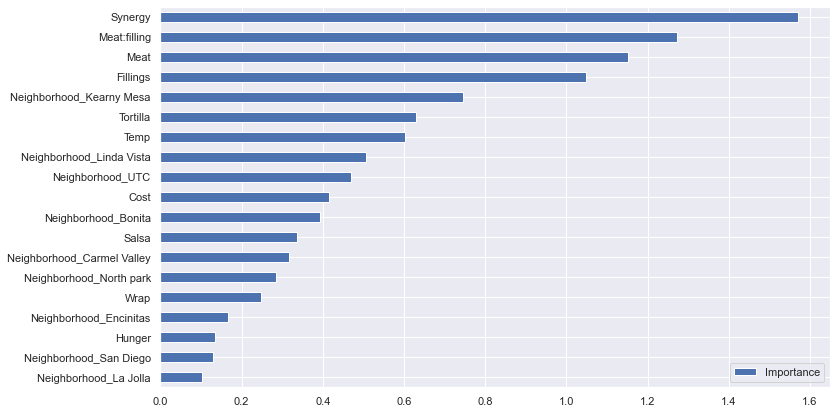

In [1350]:
onehot_columns = list(
    clf.named_steps['preprocessor'].named_transformers_['cat'].
    named_steps['one_hot'].get_feature_names(input_features=['Neighborhood']))

features_names = list(numeric_features)
features_names.extend(onehot_columns)
feature_importances = clf.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame(list(zip(features_names, feature_importances)), 
                       columns =['Feature', 'Importance'],
                      index=features_names)
coef_df.set_index('Feature')
coef_df.sort_values(by='Importance', axis=0, ascending=True, inplace=True)
coef_df.loc[coef_df['Importance'] > 0.1 ].plot(kind='barh')
plt.gcf().set_size_inches(12, 7)

### Get model's validation accuracy

In [1254]:
# Confusing matrix
print("Validation model score: %.4f" % pipe.score(X_validate, y_validate))

Validation model score: 0.8378


In [1256]:
# better_clf_auc_ins = plot_roc_curve(better_clf, X_validate, y_validate)
# plt.grid(True)
# plt.plot([0, 1], [0, 1])
# plt.show()

### Get your model's test accuracy

In [1249]:
# In-sample and out-of-sample plot?
print("Testing model score: %.4f" % pipe.score(X_test, y_test))

Testing model score: 0.7812
